In [1]:
%pwd

'C:\\Users\\Hp\\Desktop\\git-DS-codes'

# Prediction of housing prices through linear regression.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns',0)
house=pd.read_csv("Melbourne_housing_FULL.csv")
#To check any missing values are ther or not
house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
#check any further missing values are there or not
house.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [5]:
house=house.drop(['Address'],axis=1)

In [6]:
house_new=house.dropna()

In [7]:
house_new.isnull().any()

Suburb           False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [8]:
#check any further missing values are there or not
house_new.isnull().any()

Suburb           False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [9]:
 house_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 20 columns):
Suburb           8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(7)
memory usage: 1.4+ MB


In [10]:
house_new[house_new.duplicated()].shape

(0, 20)

In [11]:
house_new.shape

(8887, 20)

In [12]:
categoric_cols =house_new.select_dtypes(['object']).columns


In [13]:
categoric_cols

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [14]:
house_new[categoric_cols]=house_new[categoric_cols].astype('category')

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
house_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 20 columns):
Suburb           8887 non-null category
Rooms            8887 non-null int64
Type             8887 non-null category
Price            8887 non-null float64
Method           8887 non-null category
SellerG          8887 non-null category
Date             8887 non-null category
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null category
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null category
Propertycount    8887 non-null float64
dtypes: category(7), float64(12), int64(1)
memory usage: 1.1 MB


In [16]:
house_new.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Apartment Location distance')

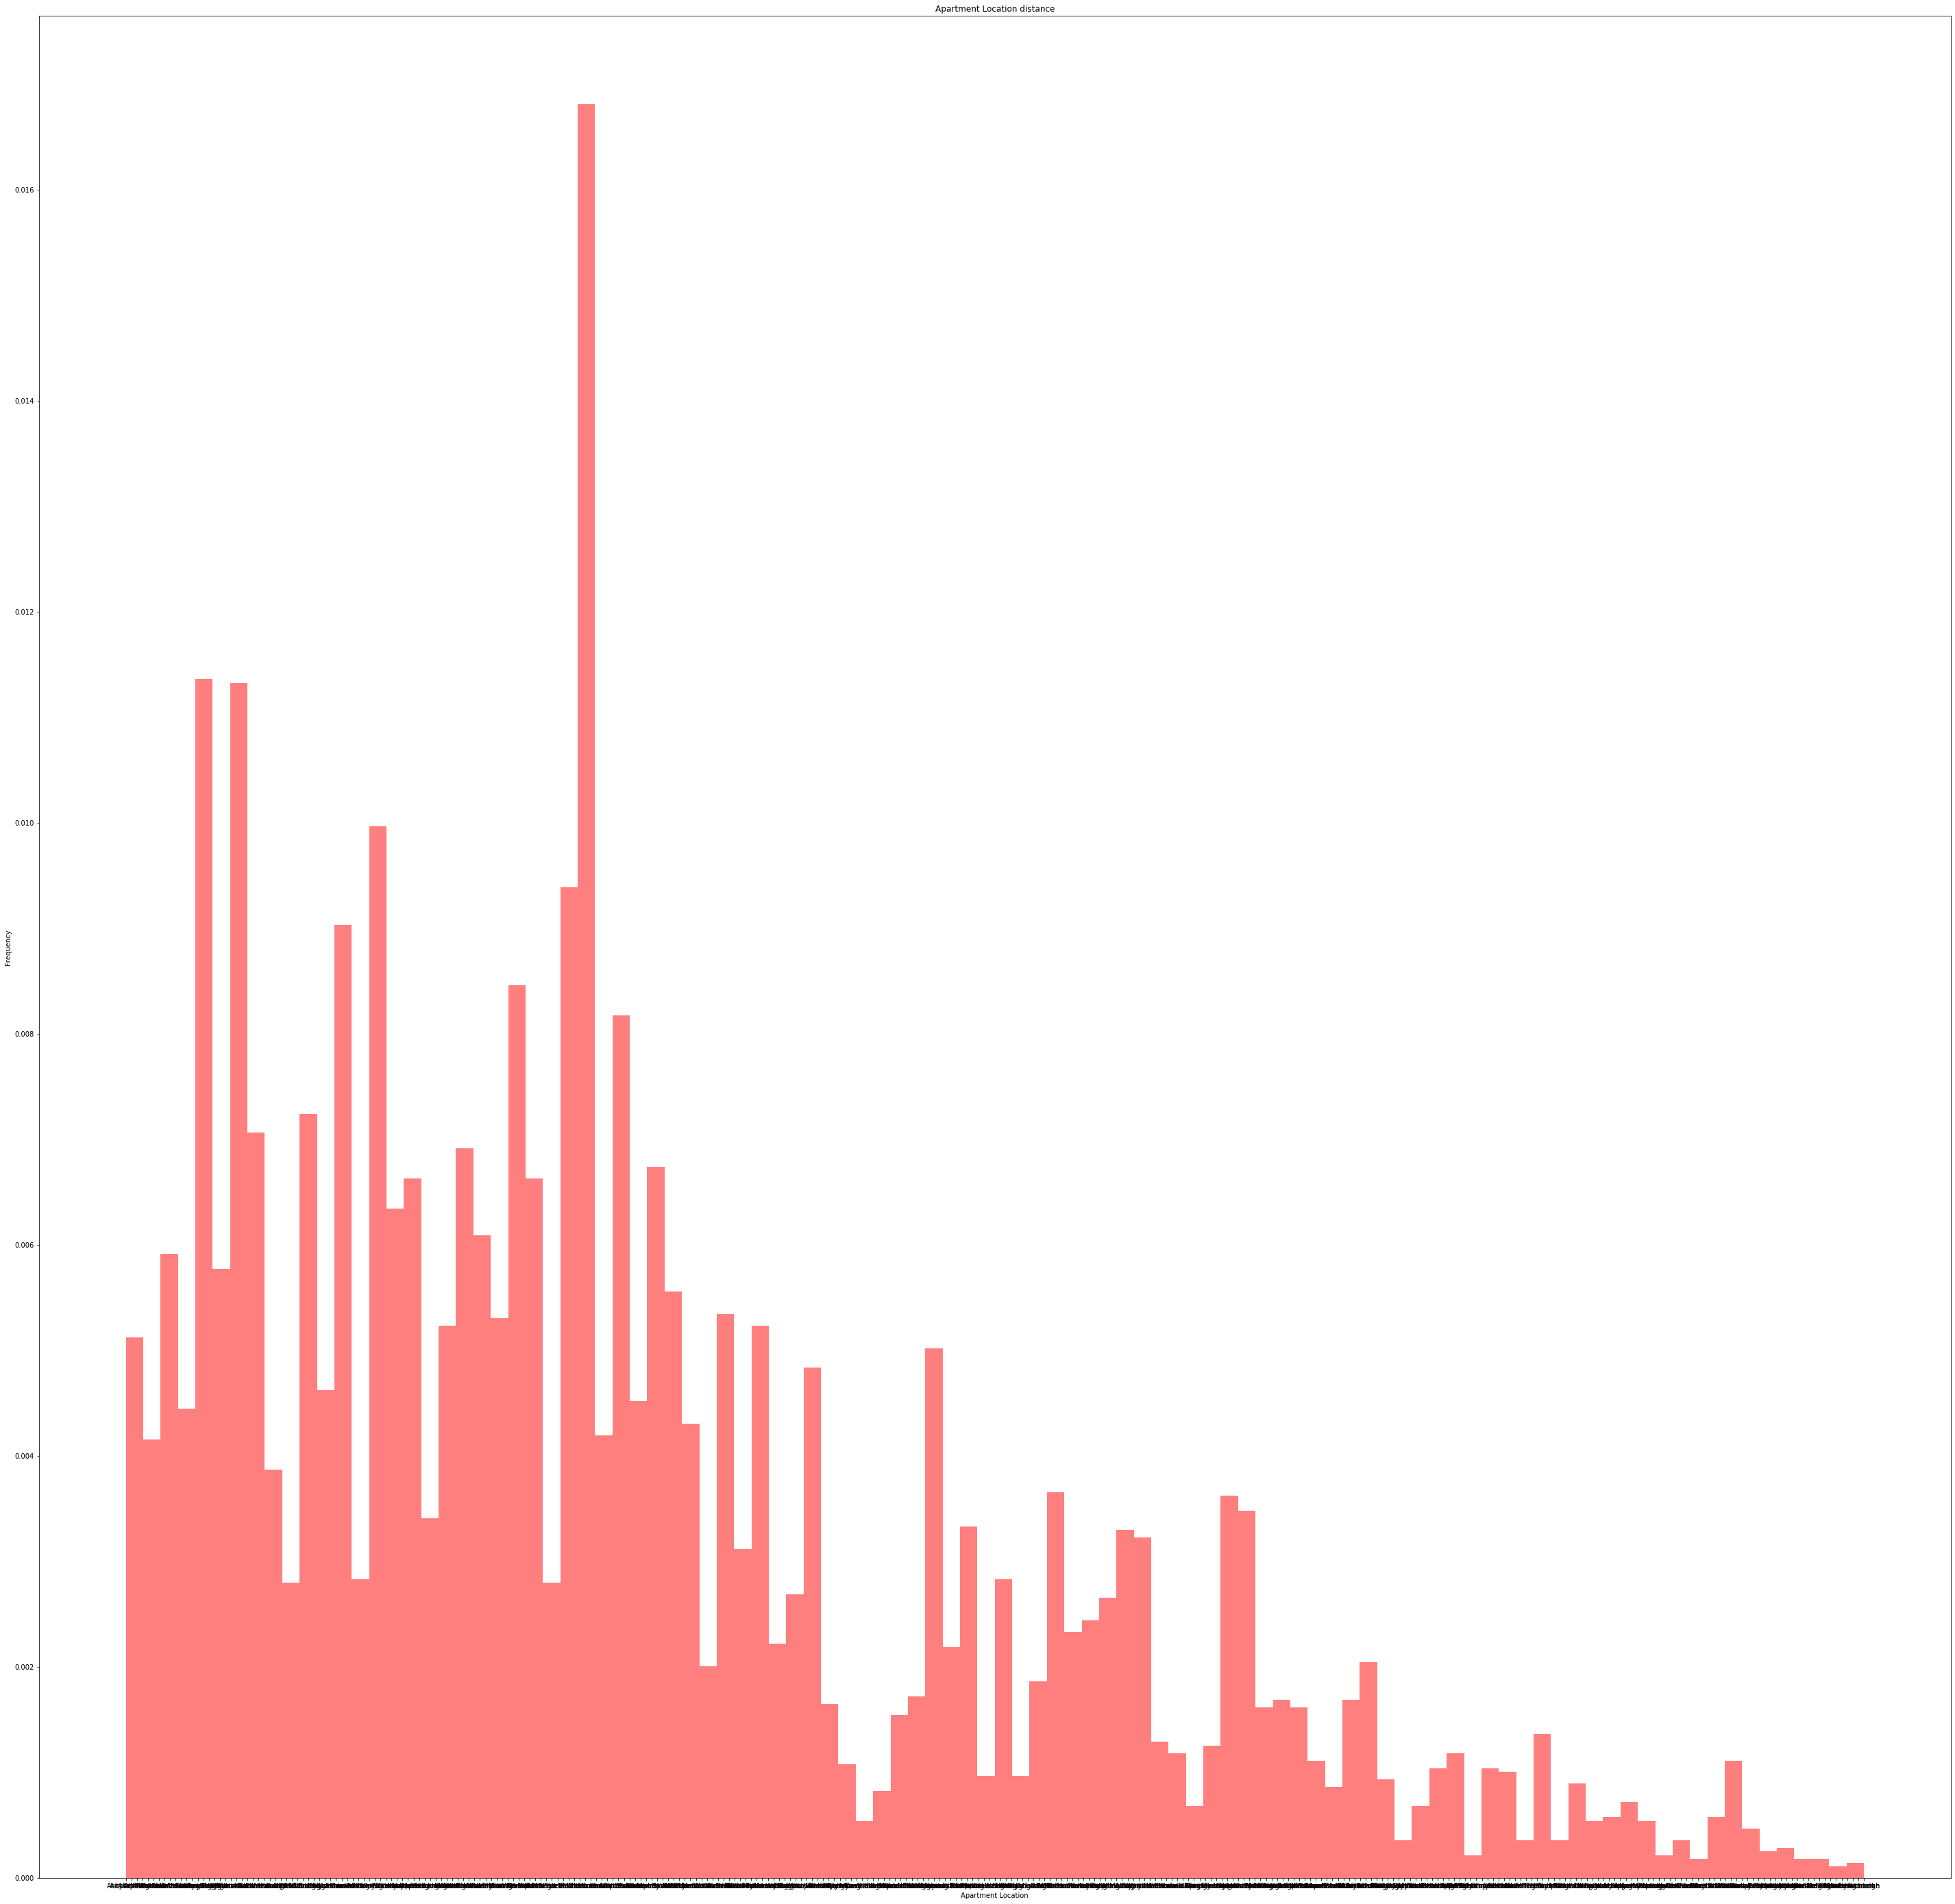

In [17]:
fig = plt.figure(figsize=[50,50])
ax = fig.add_subplot (1,1,1)
ax.hist (house_new['Suburb'], bins=100, normed=True, color='r', alpha=0.5)
ax.set_xlabel ('Apartment Location')
ax.set_ylabel ('Frequency')
ax.set_title ('Apartment Location distance')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Type of House')

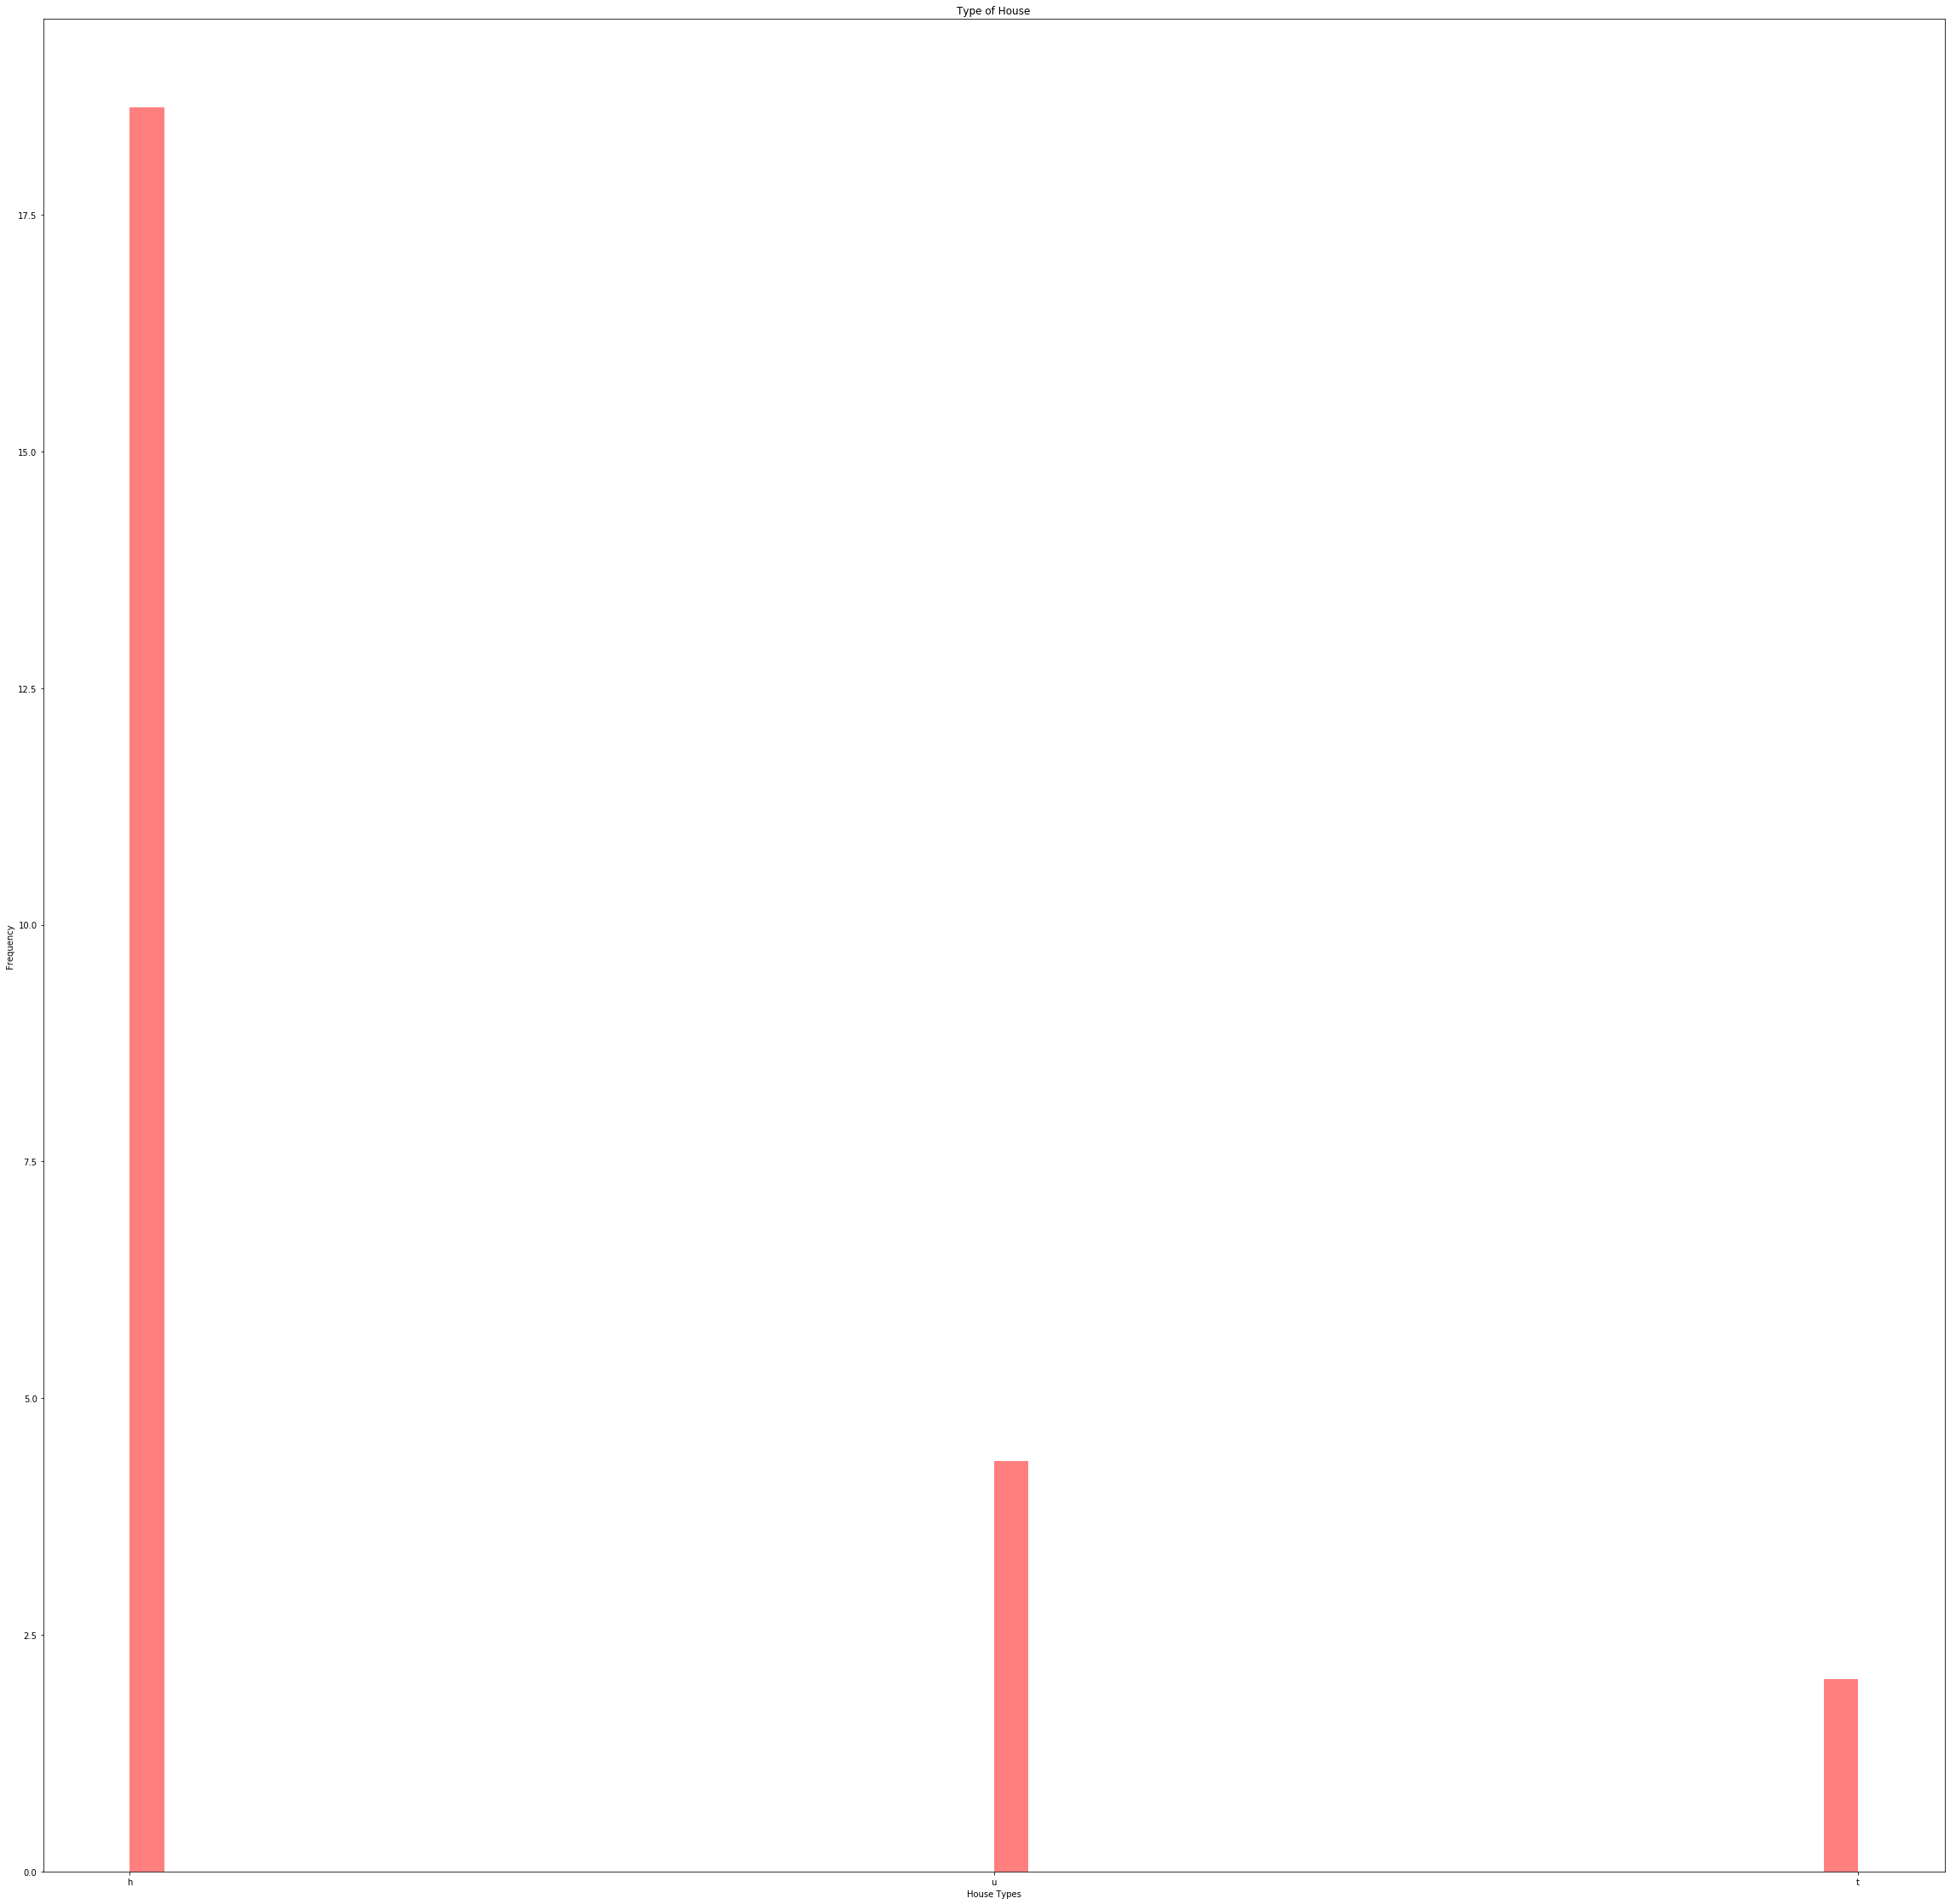

In [18]:
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot (1,1,1)
ax.hist (house_new['Type'], bins=50, normed=True, color='r', alpha=0.5)
ax.set_xlabel ('House Types')
ax.set_ylabel ('Frequency')
ax.set_title ('Type of House')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Type of Houses')

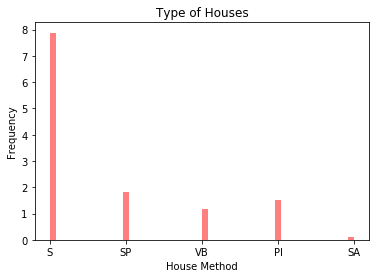

In [19]:
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.hist (house_new['Method'], bins=50, normed=True, color='r', alpha=0.5)
ax.set_xlabel ('House Method')
ax.set_ylabel ('Frequency')
ax.set_title ('Type of Houses')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Seller of House')

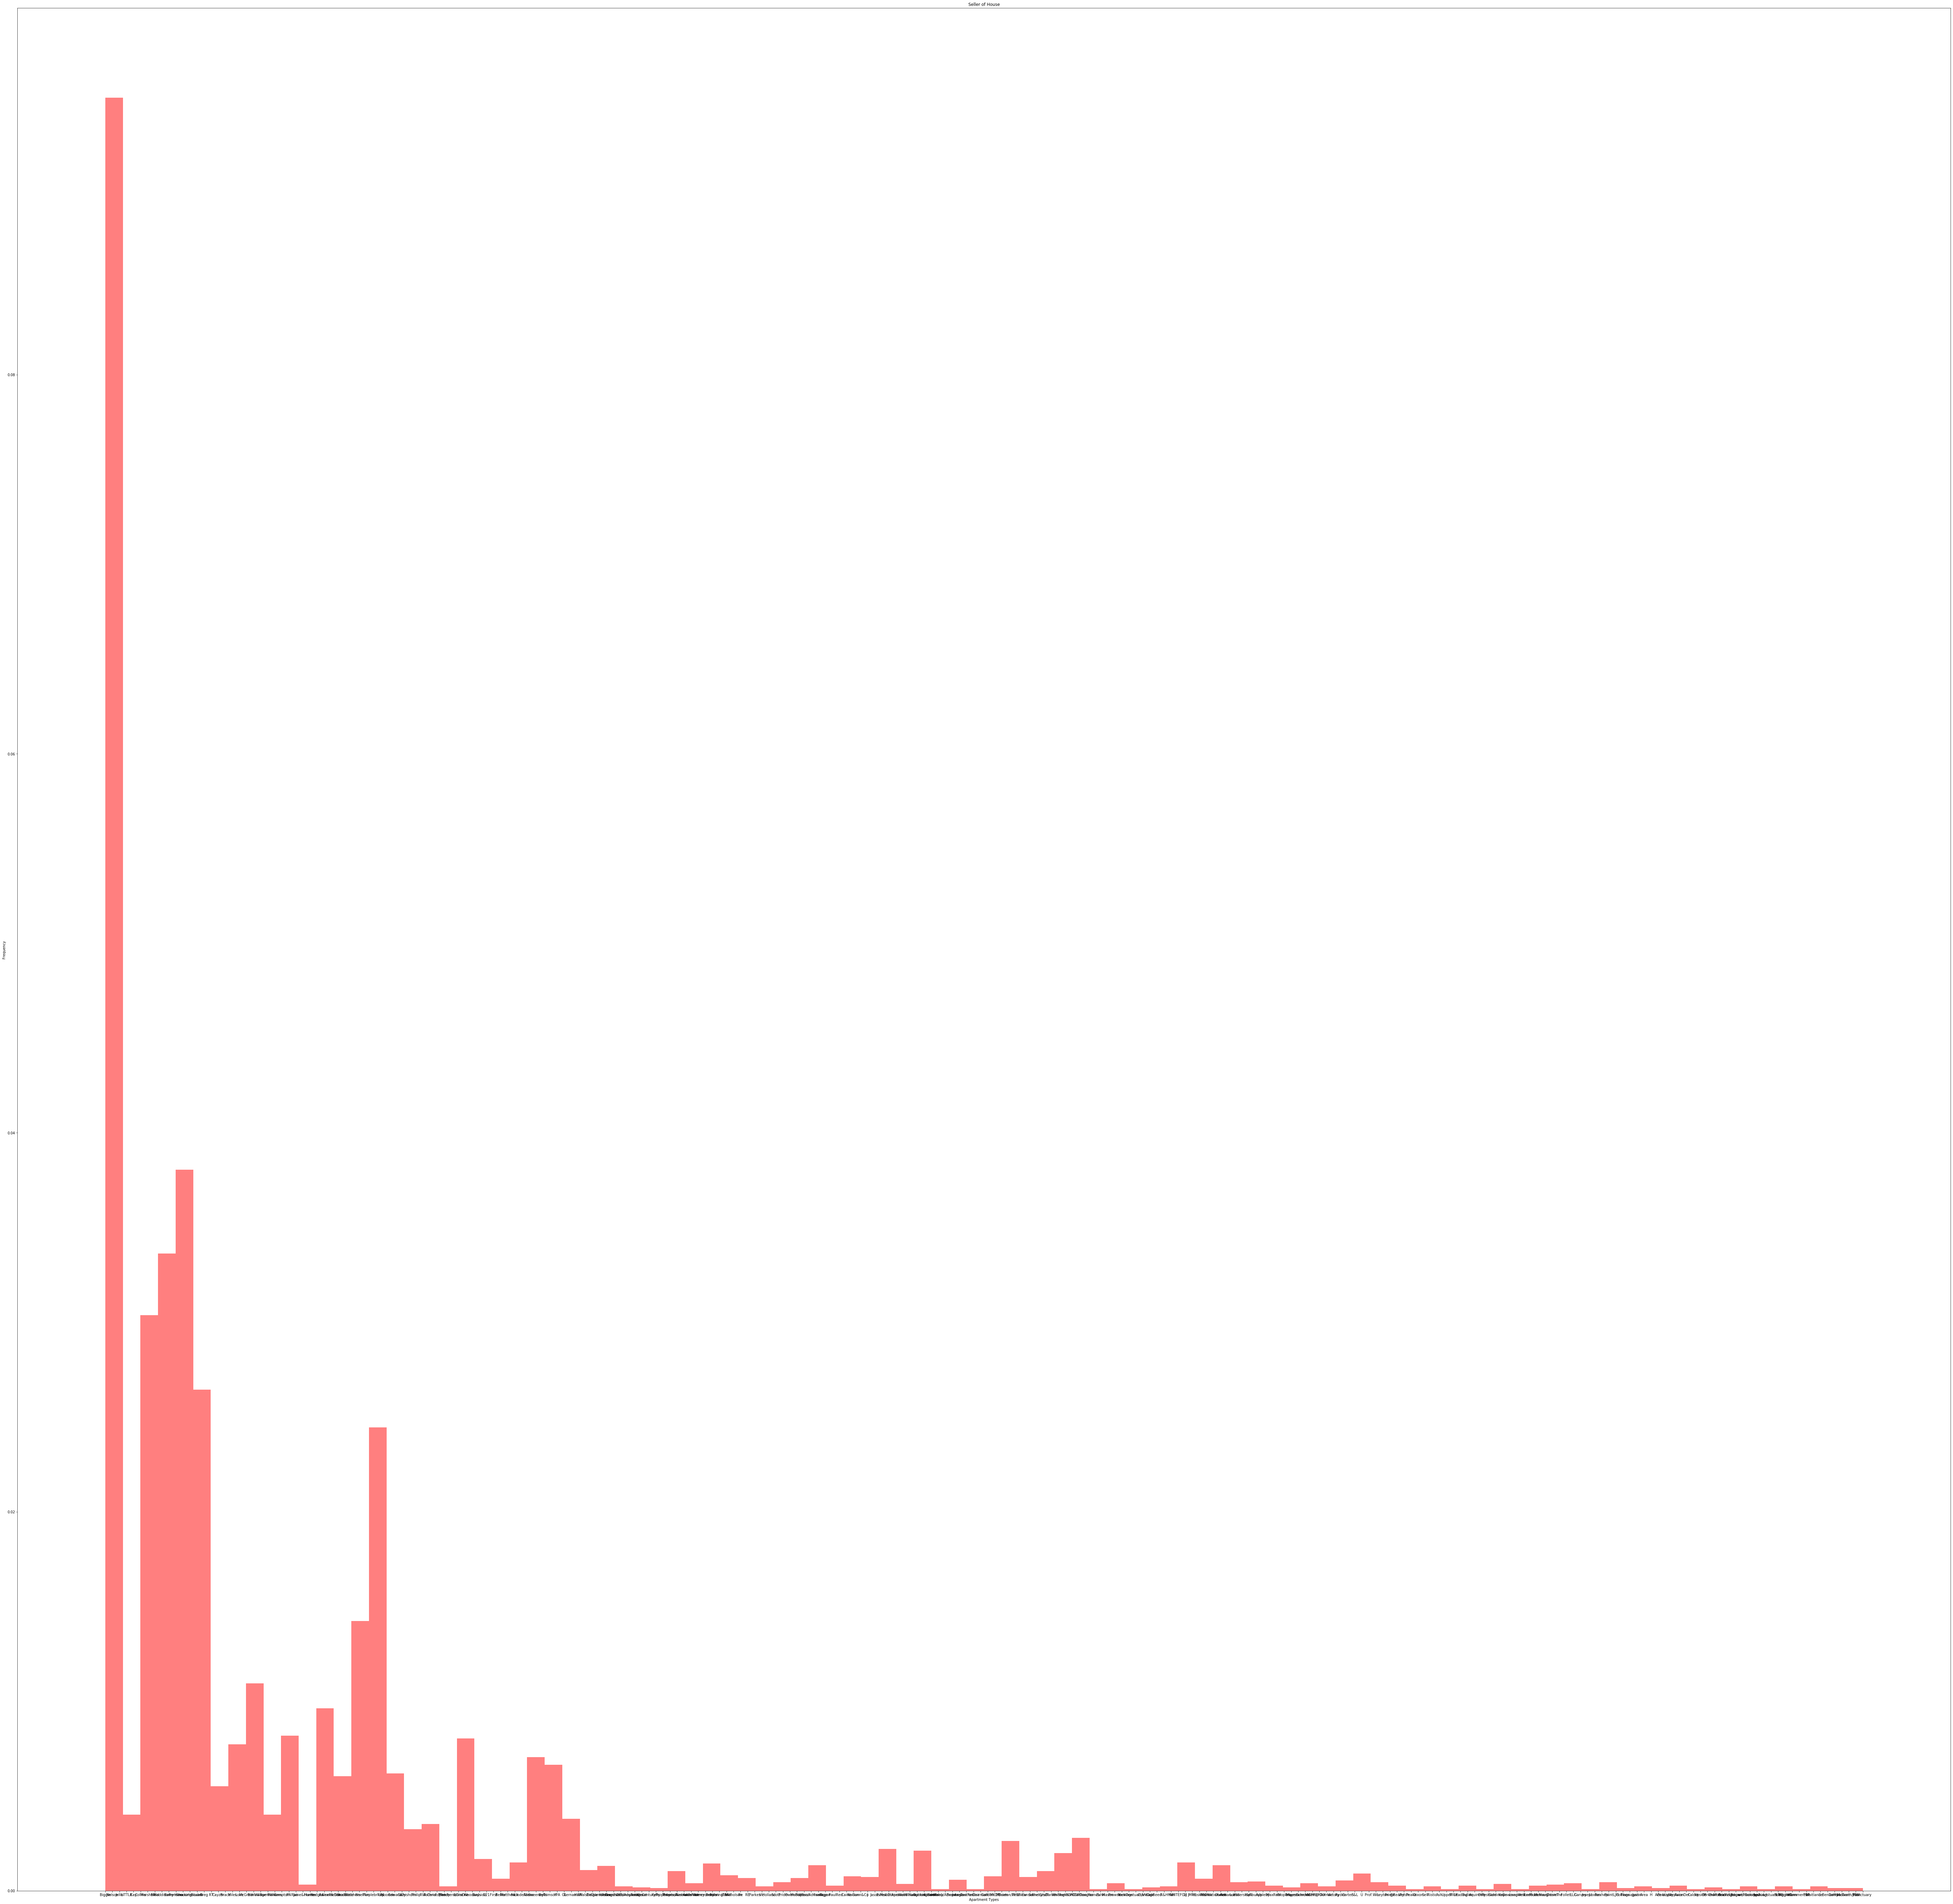

In [20]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot (1,1,1)
ax.hist (house_new['SellerG'], bins=100, normed=True, color='r', alpha=0.5)
ax.set_xlabel ('Apartment Types')
ax.set_ylabel ('Frequency')
ax.set_title ('Seller of House')

Text(0.5, 1.0, 'Region')

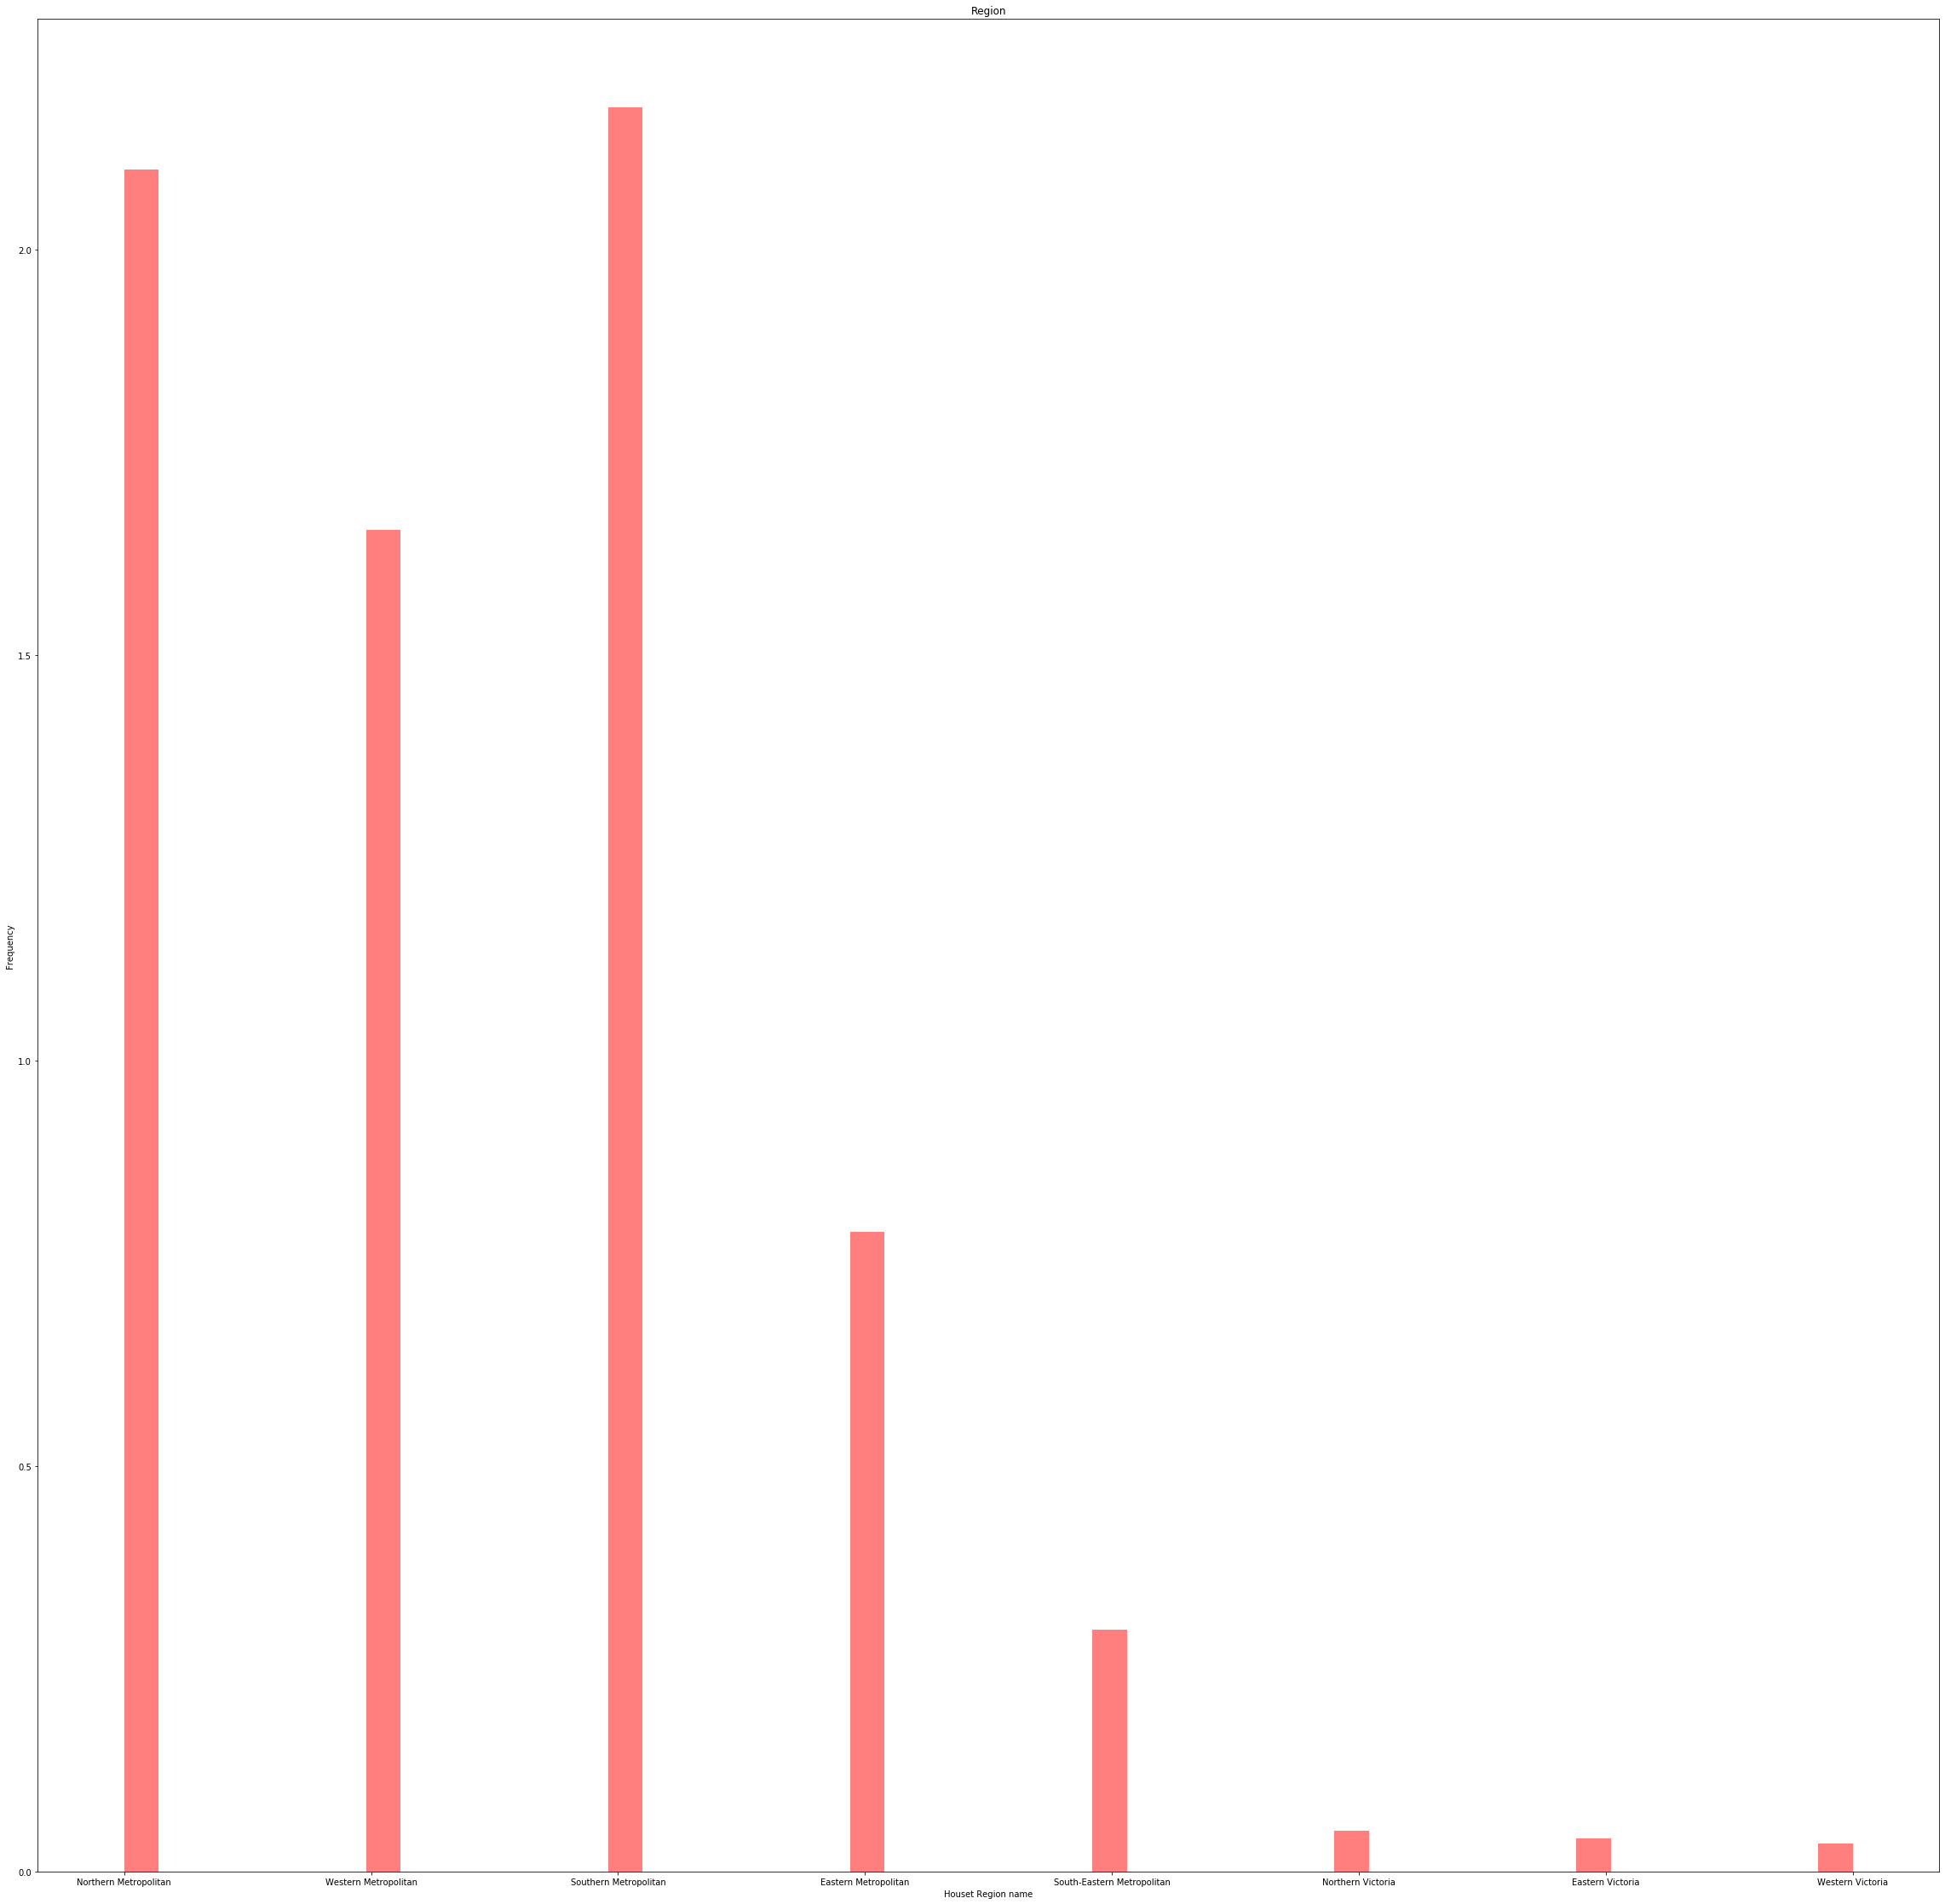

In [21]:
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot (1,1,1)
ax.hist (house_new['Regionname'], bins=50, density= True, color='r', alpha=0.5)
ax.set_xlabel ('Houset Region name')
ax.set_ylabel ('Frequency')
ax.set_title ('Region')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'HouseCouncil Area')

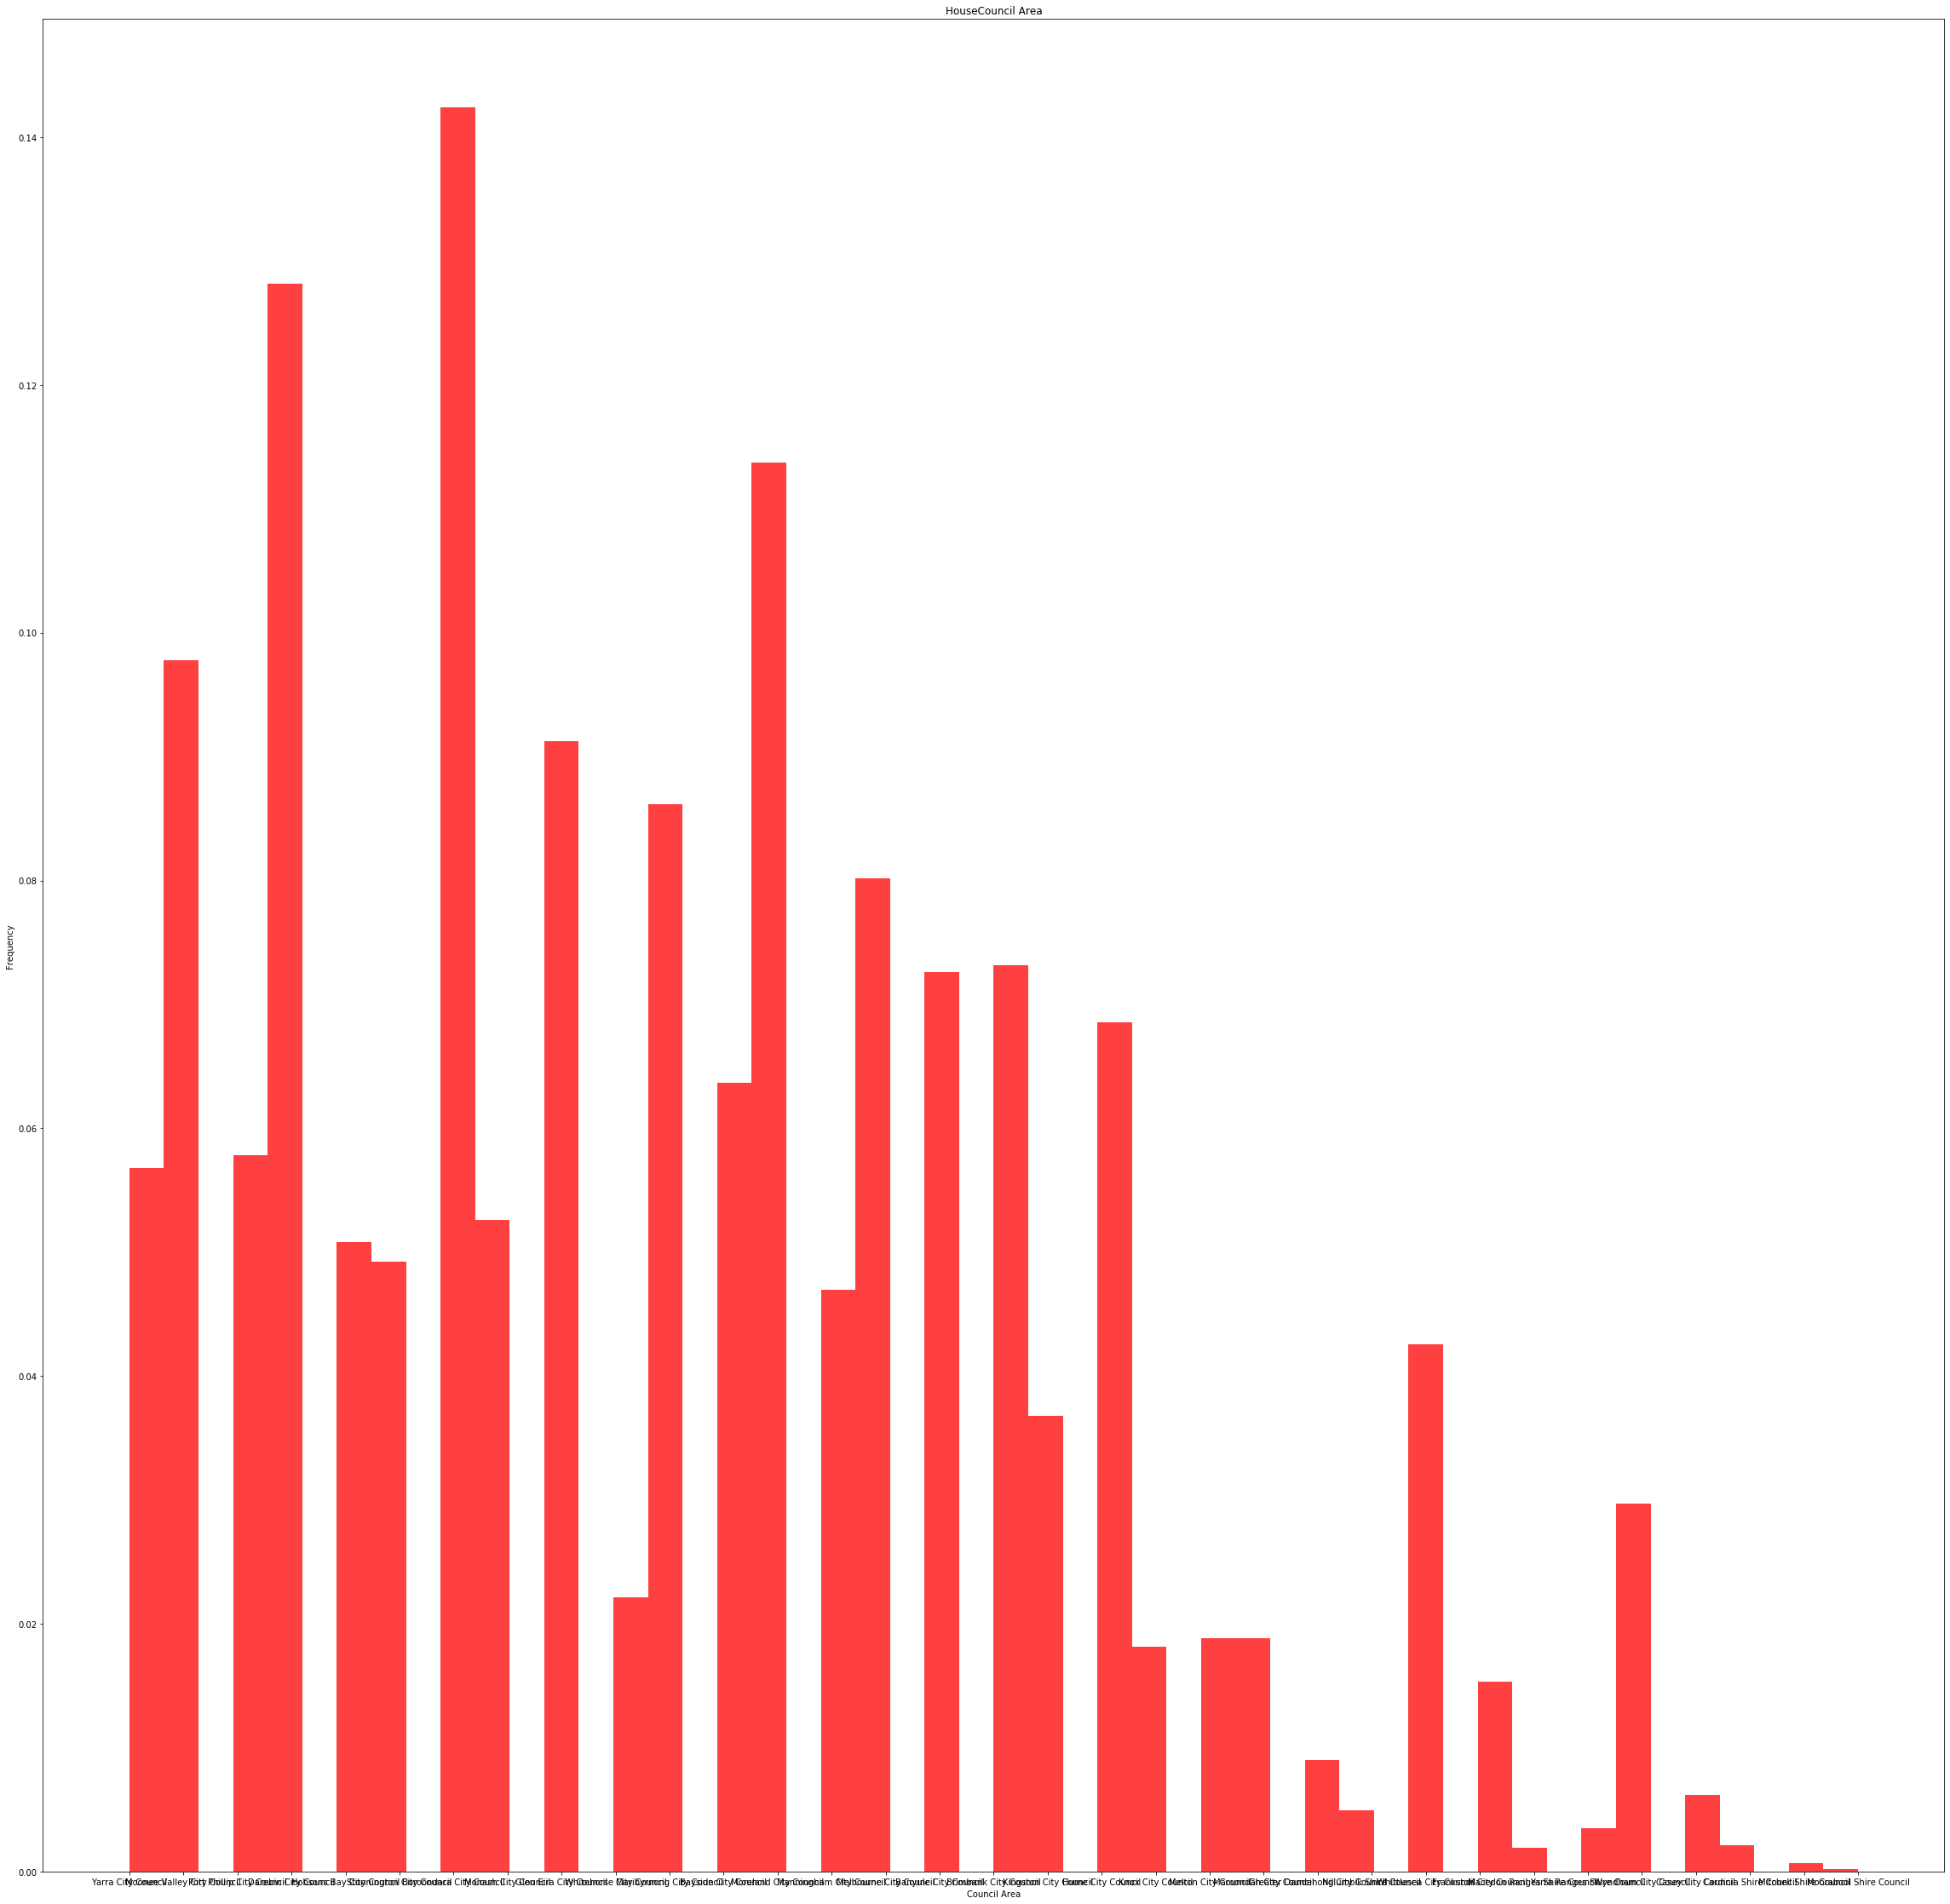

In [22]:
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot (1,1,1)
ax.hist (house_new['CouncilArea'], bins=50, normed=True, color='r', alpha=0.75)
ax.set_xlabel ('Council Area')
ax.set_ylabel ('Frequency')
ax.set_title ('HouseCouncil Area') 

How common factors are affecting the price of the houses ?
Let us start with , If price is getting affecting by CouncilArea,Region Name,SellerG,Type,Bedrooms,Suburb ?


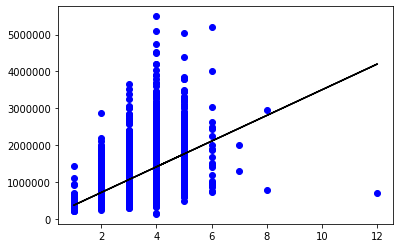

In [23]:
#linear regression model to predict “Selling Price” through Number of Rooms.
X=np.array(house_new['Rooms']).reshape(-1,1)
y=np.array(house_new['Price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
y_predict=reg.predict(X_test)
y_predict
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_predict, color ='k') 
  
plt.show() 
#we can see as number of rooms increases the price rises.

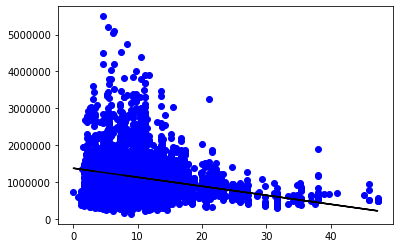

In [24]:
#linear regression model to predict “Selling Price” through Distance
X=np.array(house_new['Distance']).reshape(-1,1)
y=np.array(house_new['Price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
y_predict=reg.predict(X_test)
y_predict
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_predict, color ='k') 
  
plt.show() 
#we can see as distance increases the price decreases.

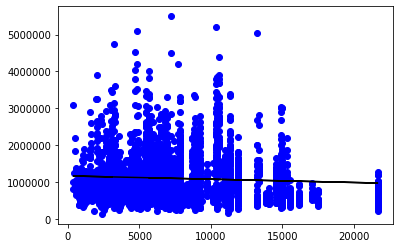

In [25]:
#linear regression model to predict “Selling Price” through Property Count
X=np.array(house_new['Propertycount']).reshape(-1,1)
y=np.array(house_new['Price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
y_predict=reg.predict(X_test)
y_predict
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_predict, color ='k') 
  
plt.show() 
#we can see Property Count doesnot affect that much to house prices..

In [26]:
house_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 20 columns):
Suburb           8887 non-null category
Rooms            8887 non-null int64
Type             8887 non-null category
Price            8887 non-null float64
Method           8887 non-null category
SellerG          8887 non-null category
Date             8887 non-null category
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null category
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null category
Propertycount    8887 non-null float64
dtypes: category(7), float64(12), int64(1)
memory usage: 1.1 MB


In [31]:
#convert categorical variables to int using get dummies.
##linear regression model to predict “Selling Price” through all variables
X = pd.get_dummies(house_new.drop(columns=['Price','Date'],axis=1),drop_first=True)
y = house_new['Price']
y=np.array(y).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#afp = np.append(X_train['AFP'].values, X_test['AFP'].values)
#X=std.fit_transform(X)
y=std.fit_transform(y)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
y_predict=reg.predict(X_test)
#print(reg.coef_)
print(reg.score(X_test,y_test))

0.7122129705069098


We use train data and test data , train data to train our machine and test data to see if it has learnt the data well or not
After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 71%.
This is really a very weak score. To increase the score,We use a different method , which is very important for weak prediction models such as this.
This might seem to be a bit advanced but if understood is a really brilliant tool to enable better predictions.

For building a prediction model , many experts use gradient boosting regression which is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [30]:
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,...,SellerG_Westside,SellerG_Whiting,SellerG_William,SellerG_Williams,SellerG_Wilson,SellerG_Win,SellerG_Wood,SellerG_Woodards,SellerG_Wyndham,SellerG_YPA,SellerG_Zahn,SellerG_buyMyplace,SellerG_hockingstuart,SellerG_hockingstuart/Advantage,SellerG_hockingstuart/Biggin,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
11,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
14,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0,0,0,0,0,0,0,0,0,0

In [32]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
from sklearn.metrics import r2_score

print("Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

Train acc:  0.7560311858553579
Test acc:  0.7122129705069098
